In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
fname = '../original_data/Revised By ASIN-Datail Page Sales and Traffic by Parent Item.csv'
df = pd.read_csv(fname)
df = df.replace(',','',regex=True)
df.head()

,(Parent) ASIN,Title,Sessions,Session Percentage,Page Views,Page Views Percentage,Buy Box Percentage,Units Ordered,Unit Session Percentage,Ordered Product Sales,Total Order Items
0,B00CWU48VI,Isolation Vibration m6 Rubber Mount Replacemen...,764,0.16%,1164,0.18%,83%,177,23.17%,$1514.48,149
1,B00CWU4DTA,Isolation Vibration m6 Rubber Mount Replacemen...,973,0.20%,1585,0.25%,44%,70,7.19%,$261.89,62
2,B005B00EVY,HPS HTHH-062-BLK Silicone High Temperature Rei...,3038,0.64%,4166,0.66%,15%,47,1.55%,$515.95,33
3,B004NYCI2C,HPS HTSC-200-L4-BLK Silicone High Temperature ...,2351,0.49%,3418,0.54%,9%,58,2.47%,$648.23,30
4,B00ATI059E,"Black 3"" Rubber Coupler hose for shortram cold...",424,0.09%,604,0.10%,88%,51,12.03%,$134.41,28


In [6]:
df['Page Views']

0        1164
1        1585
2        4166
3        3418
4         604
         ... 
10436      20
10437     336
10438    3281
10439      78
10440      32
Name: Page Views, Length: 10441, dtype: object

In [4]:
df['Buy Box Percentage'] = df['Buy Box Percentage'].str.rstrip('%').astype('float') /100.0
df['Page Views Percentage'] = df['Page Views Percentage'].str.rstrip('%').astype('float') /100.0

In [5]:
df['Ordered Product Sales'] = df['Ordered Product Sales'].str.replace('$','').astype('float')

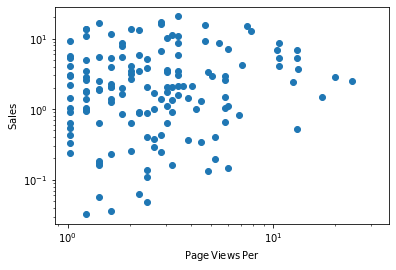

In [17]:
scale_y = (df['Ordered Product Sales']-np.mean(df['Ordered Product Sales'])) / np.std(df['Ordered Product Sales'])
scale_x = (df['Page Views Percentage']*100 - np.mean(df['Page Views Percentage']*100)) / np.std(df['Page Views Percentage']*100)
plt.plot(scale_x[scale_x>1],scale_y[scale_x>1],'o')
plt.xlabel(r'$\rm{Page\,Views\,Per}$')
plt.ylabel(r'$\rm{Sales}$')
plt.yscale('log')
plt.xscale('log')
#plt.hist(df['Buy Box Percentage'])